In [1]:
!pip install flair

     |████████████████████████████████| 401 kB 14.2 MB/s 
     |████████████████████████████████| 1.6 MB 22.9 MB/s 
     |████████████████████████████████| 77 kB 4.5 MB/s 
     |████████████████████████████████| 788 kB 67.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.0 MB 38.6 MB/s 
     |████████████████████████████████| 53 kB 1.1 MB/s 
     |████████████████████████████████| 981 kB 7.7 MB/s 
     |████████████████████████████████| 48 kB 2.8 MB/s 
     |████████████████████████████████| 46 kB 1.7 MB/s 
     |████████████████████████████████| 1.2 MB 38.2 MB/s 
     |████████████████████████████████| 19.7 MB 47.0 MB/s 
     |████████████████████████████████| 199 kB 50.2 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.6 MB 49.9 MB/s 
     |████████████████████████████████| 895 kB 45.6 MB/s 
     |████████

In [2]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import flair
from flair.data import Sentence
from nltk.tokenize import word_tokenize
import nltk
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from ast import literal_eval

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
raw_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/final/raw_data.csv')

FileNotFoundError: ignored

In [ ]:
def dataprepration(city):
  data = raw_data.loc[raw_data['city']==city]
  data.reset_index(drop=True,  inplace=True)
  # data.head(5)

  data['review'] = data.groupby(['city', 'place']).transform(lambda x : ' '.join(x))
  data = data.drop_duplicates() 

  #finding lattitude longitude of places in the city
  locator = Nominatim(user_agent="mygeocoder")
  geocode = RateLimiter(locator.geocode, min_delay_seconds = 1,   return_value_on_exception = None)
  latlang=[]
  for i, j in data.iterrows():
    mcityplace = j['place'] + " " + j['city'] + " " + 'India';
    print(mcityplace)
    location = geocode(mcityplace)
    if location!=None:
      print(location.latitude,location.longitude)
      latlang.append([location.latitude,location.longitude])
    else:
      latlang.append([])
  data['new_lat_long']=latlang

  #saving city data
  # data['Raw_Review']= data['Raw_Review'].apply(literal_eval)
  # data['new_lat_long']=data['new_lat_long'].apply(literal_eval)
  data = data[data["new_lat_long"].astype(bool)]
  data.reset_index(drop=True,  inplace=True)
  lat=[]
  longi=[]
  for i in range(data.shape[0]):
    a=data.iloc[i]['new_lat_long']
    lat.append(a[0])
    longi.append(a[1])

  data['Latitude']=lat
  data['Longitude']=longi
  data.drop('new_lat_long', axis=1, inplace=True)
  data.to_csv('/content/drive/MyDrive/IR_Project_Shared/final/'+ city +'_data.csv', index=False)


In [ ]:
#chennai data prepration
dataprepration('Chennai')

In [13]:
delhi_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/runtime/delhi_data.csv')
print("Delhi ",delhi_data.shape)

# chennai_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/runtime/Chennai_data.csv')
# print(chennai_data)

mumbai_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/runtime/Mumbai_data.csv')
print("Mumbai ",mumbai_data.shape)

bengaluru_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/runtime/Bengaluru_data.csv')
print("Bengaluru ",bengaluru_data.shape)

pune_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/runtime/Pune_data.csv')
print("Pune  ",pune_data.shape)

hyderabad_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/runtime/Hyderabad_data.csv')
print("Hyderabad ",hyderabad_data.shape)

agra_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/runtime/Agra_data.csv')
print("Agra ",agra_data.shape)

jaipur_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/runtime/Jaipur_data.csv')
print("Jaipur " ,jaipur_data.shape)

udaipur_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/runtime/Udaipur_data.csv')
print("Udaipur ",udaipur_data.shape)

kolkata_data = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/runtime/Kolkata_data.csv')
print("kolkata ",kolkata_data.shape)

print(len(udaipur_data['place'].unique()))

Delhi  (193, 5)
Mumbai  (164, 5)
Bengaluru  (118, 5)
Pune   (83, 5)
Hyderabad  (77, 5)
Agra  (26, 5)
Jaipur  (34, 5)
Udaipur  (22, 5)
kolkata  (76, 5)
22


In [ ]:
!pip install pysummarization

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pysummarization.nlpbase.auto_abstractor import AutoAbstractor
from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer
from pysummarization.abstractabledoc.top_n_rank_abstractor import TopNRankAbstractor

In [ ]:
auto_abstractor = AutoAbstractor()
auto_abstractor.tokenizable_doc = SimpleTokenizer()
auto_abstractor.delimiter_list = [".", '\n']
abstractable_doc = TopNRankAbstractor()
delhi_data['review_summ'] = delhi_data['review'].apply(lambda x: " ". join(y for y in auto_abstractor.summarize(x, abstractable_doc)['summarize_result']))
# chennai_data['review_summ'] = chennai_data['review'].apply(lambda x: " ". join(y for y in auto_abstractor.summarize(x, abstractable_doc)['summarize_result']))
mumbai_data['review_summ'] = mumbai_data['review'].apply(lambda x: " ". join(y for y in auto_abstractor.summarize(x, abstractable_doc)['summarize_result']))
bengaluru_data['review_summ'] = bengaluru_data['review'].apply(lambda x: " ". join(y for y in auto_abstractor.summarize(x, abstractable_doc)['summarize_result']))
hyderabad_data['review_summ'] = hyderabad_data['review'].apply(lambda x: " ". join(y for y in auto_abstractor.summarize(x, abstractable_doc)['summarize_result']))
agra_data['review_summ'] = agra_data['review'].apply(lambda x: " ". join(y for y in auto_abstractor.summarize(x, abstractable_doc)['summarize_result']))
jaipur_data['review_summ'] = jaipur_data['review'].apply(lambda x: " ". join(y for y in auto_abstractor.summarize(x, abstractable_doc)['summarize_result']))
udaipur_data['review_summ'] = udaipur_data['review'].apply(lambda x: " ". join(y for y in auto_abstractor.summarize(x, abstractable_doc)['summarize_result']))
kolkata_data['review_summ'] = kolkata_data['review'].apply(lambda x: " ". join(y for y in auto_abstractor.summarize(x, abstractable_doc)['summarize_result']))
pune_data['review_summ'] = pune_data['review'].apply(lambda x: " ". join(y for y in auto_abstractor.summarize(x, abstractable_doc)['summarize_result']))



In [ ]:
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings

In [ ]:
delhi_data

,city,place,review,Latitude,Longitude
0,New Delhi,Chhatarpur Temple,"Heard a lot about it, so went to visit with fa...",28.502250,77.181244
1,New Delhi,DLF Promenade Mall,Very recently we were at this mall with friend...,28.542468,77.155770
2,New Delhi,Plaza Premium Lounge,i stayed for 8hrs as my lay over was 12hrs.sma...,28.613939,77.209021
3,New Delhi,Adventure Island,i have been so may amusement parks but this ex...,28.725135,77.113468
4,New Delhi,3Cs Mall,I ordered for a idli and south Indian filter c...,28.565812,77.246847
...,...,...,...,...,...
188,New Delhi,West Gate Mall,This mall is now very old and needs some revam...,28.653090,77.123192
189,New Delhi,Yamuna Sports Complex,I am member of this complex and since I joined...,28.663555,77.311613
190,New Delhi,Western Court Building,Visiting this iconic building takes one back i...,28.623772,77.217882
191,New Delhi,Yogmaya Temple,The temple is dedicated to Yogamaya who is con...,28.525251,77.182706


In [ ]:
def processing(data):
  glove_embedding = WordEmbeddings('glove')
  document_embeddings = DocumentPoolEmbeddings([glove_embedding])
  embedding=[]
  for i, j in data.iterrows():
    sentence = Sentence(j['review'])
    document_embeddings.embed(sentence)
    embedding.append(sentence.get_embedding().cpu().numpy())
  return embedding

In [ ]:
# delhi_embedding = processing(delhi_data)
# chennai_embedding = processing(chennai_data)
mumbai_embedding = processing(mumbai_data)
bengaluru_embedding = processing(bengaluru_data)
hyderabad_embedding = processing(hyderabad_data)
agra_embedding = processing(agra_data)
jaipur_embedding = processing(jaipur_data)
udaipur_embedding = processing(udaipur_data)
kolkata_embedding = processing(kolkata_data)
pune_embedding = processing(pune_data)


In [ ]:
len(kolkata_embedding)

76

In [ ]:
import joblib
# joblib.dump(delhi_embedding, '/content/drive/MyDrive/IR_Project_Shared/again/delhi_embedding.sav')
# joblib.dump(chennai_embedding, '/content/drive/MyDrive/IR_Project_Shared/again/chennai_embedding.sav')
joblib.dump(mumbai_embedding, '/content/drive/MyDrive/IR_Project_Shared/again/mumbai_embedding.sav')
joblib.dump(bengaluru_embedding, '/content/drive/MyDrive/IR_Project_Shared/again/bengaluru_embedding.sav')
joblib.dump(hyderabad_embedding, '/content/drive/MyDrive/IR_Project_Shared/again/hyderabad_embedding.sav')
joblib.dump(agra_embedding, '/content/drive/MyDrive/IR_Project_Shared/again/agra_embedding.sav')
joblib.dump(jaipur_embedding, '/content/drive/MyDrive/IR_Project_Shared/again/jaipur_embedding.sav')
joblib.dump(udaipur_embedding, '/content/drive/MyDrive/IR_Project_Shared/again/udaipur_embedding.sav')
joblib.dump(kolkata_embedding, '/content/drive/MyDrive/IR_Project_Shared/again/kolkata_embedding.sav')
joblib.dump(pune_embedding, '/content/drive/MyDrive/IR_Project_Shared/again/pune_embedding.sav')



['/content/drive/MyDrive/IR_Project_Shared/again/pune_embedding.sav']

In [ ]:
def similarity(d2,tfidf_matrix):
  res =[]
  for i in range(len(tfidf_matrix)):
    dot = np.dot(d2,tfidf_matrix[i])
    b = np.power(tfidf_matrix[i],2)
    c= np.power(d2,2)
    moda = np.sqrt(np.sum(b))
    modb =np.sqrt(np.sum(c))
    result = dot/(moda*modb)
    res.append([i,result])
  return res

In [ ]:
def make_querytfidf(query,city,type):
  mstopwords = set(stopwords.words('english'))

  if type=='berts':
    document_embeddings = TransformerDocumentEmbeddings('bert-base-uncased')
  elif type=='bertl':
    document_embeddings = TransformerDocumentEmbeddings('bert-large-uncased')
  elif type=='glovepool':
    glove_embedding = WordEmbeddings('glove')
    document_embeddings = DocumentPoolEmbeddings([glove_embedding])
  else:
    glove_embedding = WordEmbeddings('glove')
    document_embeddings = DocumentRNNEmbeddings([glove_embedding])
  sentence = Sentence(query)
  document_embeddings.embed(sentence)
  matrix1 = sentence.get_embedding().cpu().numpy()
  city = city.lower()
  # print(matrix1)
  ans=[]
  if city == 'new delhi':
    # delhi_embedding = joblib.load("delhi_embedding.sav")
    # delhi_data = pd.read_csv("delhi_data.csv")
    result1 = sorted(similarity(matrix1, delhi_embedding),key=lambda x: x[1],reverse=True)
    for j in range(10):
      ans.append([delhi_data.iloc[result1[j][0]]['place'], delhi_data.iloc[result1[j][0]]['Latitude'], delhi_data.iloc[result1[j][0]]['Longitude']])#, delhi_data.iloc[result1[j][0]]['city']])
    ans_placesc = [x[0] for x in ans]
    ans_df=delhi_data[delhi_data['place'].isin(ans_placesc)]
    return ans_df
  #elif city == 'chennai':
    #result1 = sorted(similarity(matrix1, chennai_embedding),key=lambda x: x[1],reverse=True)
  elif city == 'kolkata':
    # kolkata_embedding = joblib.load("kolkata_embedding.sav")
    # kolkata_data = pd.read_csv("kolkata_data.csv")
    result1 = sorted(similarity(matrix1, kolkata_embedding),key=lambda x: x[1],reverse=True)
    print(len(result1))
    for j in range(10):
      ans.append([kolkata_data.iloc[result1[j][0]]['place'], kolkata_data.iloc[result1[j][0]]['Latitude'], kolkata_data.iloc[result1[j][0]]['Longitude']])#, delhi_data.iloc[result1[j][0]]['city']])
    ans_placesc = [x[0] for x in ans]
    ans_df=kolkata_data[kolkata_data['place'].isin(ans_placesc)]
    return ans_df
  elif city == 'pune':
    # pune_embedding = joblib.load("pune_embedding.sav")
    # pune_data = pd.read_csv("pune_data.csv")
    result1 = sorted(similarity(matrix1, pune_embedding),key=lambda x: x[1],reverse=True)
    for j in range(10):
      ans.append([pune_data.iloc[result1[j][0]]['place'], pune_data.iloc[result1[j][0]]['Latitude'], pune_data.iloc[result1[j][0]]['Longitude']])
    ans_placesc = [x[0] for x in ans]
    ans_df=pune_data[pune_data['place'].isin(ans_placesc)]
    return ans_df
  elif city == 'jaipur':
    # jaipur_embedding = joblib.load("jaipur_embedding.sav")
    # jaipur_data = pd.read_csv("jaipur_data.csv")
    result1 = sorted(similarity(matrix1, jaipur_embedding),key=lambda x: x[1],reverse=True)
    for j in range(10):
      ans.append([jaipur_data.iloc[result1[j][0]]['place'], jaipur_data.iloc[result1[j][0]]['Latitude'], jaipur_data.iloc[result1[j][0]]['Longitude']])
    ans_placesc = [x[0] for x in ans]
    ans_df=jaipur_data[jaipur_data['place'].isin(ans_placesc)]
    return ans_df
  elif city == 'udaipur':
    # udaipur_embedding = joblib.load("udaipur_embedding.sav")
    # udaipur_data = pd.read_csv("udaipur_data.csv")
    result1 = sorted(similarity(matrix1, udaipur_embedding),key=lambda x: x[1],reverse=True)
    for j in range(10):
      ans.append([udaipur_data.iloc[result1[j][0]]['place'], udaipur_data.iloc[result1[j][0]]['Latitude'], udaipur_data.iloc[result1[j][0]]['Longitude']])
    ans_placesc = [x[0] for x in ans]
    ans_df=udaipur_data[udaipur_data['place'].isin(ans_placesc)]
    return ans_df
  elif city == 'agra':
    # agra_embedding = joblib.load("agra_embedding.sav")
    # agra_data = pd.read_csv("agra_data.csv")
    result1 = sorted(similarity(matrix1, agra_embedding),key=lambda x: x[1],reverse=True)
    for j in range(10):
      ans.append([agra_data.iloc[result1[j][0]]['place'], agra_data.iloc[result1[j][0]]['Latitude'], agra_data.iloc[result1[j][0]]['Longitude']])
    ans_placesc = [x[0] for x in ans]
    ans_df=agra_data[agra_data['place'].isin(ans_placesc)]
    return ans_df
  elif city == 'hyderabad':
    # hyderabad_embedding = joblib.load("hyderabad_embedding.sav")
    # hyderabad_data = pd.read_csv("hyderabad_data.csv")
    result1 = sorted(similarity(matrix1, hyderabad_embedding),key=lambda x: x[1],reverse=True)
    for j in range(10):
      ans.append([hyderabad_data.iloc[result1[j][0]]['place'], hyderabad_data.iloc[result1[j][0]]['Latitude'], hyderabad_data.iloc[result1[j][0]]['Longitude']])
    ans_placesc = [x[0] for x in ans]
    ans_df=hyderabad_data[hyderabad_data['place'].isin(ans_placesc)]
    return ans_df
  elif city == 'bengaluru':
    # bengaluru_embedding = joblib.load("bengaluru_embedding.sav")
    # bengaluru_data = pd.read_csv("bengaluru_data.csv")
    result1 = sorted(similarity(matrix1, bengaluru_embedding),key=lambda x: x[1],reverse=True)
    for j in range(10):
      ans.append([bengaluru_data.iloc[result1[j][0]]['place'], bengaluru_data.iloc[result1[j][0]]['Latitude'], bengaluru_data.iloc[result1[j][0]]['Longitude']])
    ans_placesc = [x[0] for x in ans]
    ans_df=bengaluru_data[bengaluru_data['place'].isin(ans_placesc)]
    return ans_df
  elif city == 'mumbai':
    # mumbai_embedding = joblib.load("mumbai_embedding.sav")
    # mumbai_data = pd.read_csv("mumbai_data.csv")
    result1 = sorted(similarity(matrix1, mumbai_embedding),key=lambda x: x[1],reverse=True)
    for j in range(10):
      ans.append([mumbai_data.iloc[result1[j][0]]['place'], mumbai_data.iloc[result1[j][0]]['Latitude'], mumbai_data.iloc[result1[j][0]]['Longitude']])
    ans_placesc = [x[0] for x in ans]
    ans_df=mumbai_data[mumbai_data['place'].isin(ans_placesc)]
    return ans_df
  else:
    ##handle this exception
    return None


#bert small

In [ ]:
from flair.embeddings import TransformerDocumentEmbeddings
def processing_berts(data):
  document_embeddings = TransformerDocumentEmbeddings('bert-base-uncased')
  embedding=[]
  for i, j in data.iterrows():
    sentence = Sentence(j['review'])
    document_embeddings.embed(sentence)
    embedding.append(sentence.get_embedding().cpu().numpy())
  return embedding

In [ ]:
delhi_embedding = processing_berts(delhi_data)
mumbai_embedding = processing_berts(mumbai_data)

KeyboardInterrupt: ignored

In [ ]:
bert_sdf=make_querytfidf("I want to visit park and parks ", 'New Delhi', 'berts')
bert_sdf

,city,place,review,Latitude,Longitude
8,New Delhi,Ajmal Khan Road,I enjoy shopping here . It has hoz só many thi...,28.650306,77.192361
11,New Delhi,Art Spice,It is a pretty setup. The programme was well o...,19.852860,72.212983
21,New Delhi,Castle And king,So glad a friend recommended Castle and King t...,28.597878,77.057935
35,New Delhi,Death Valley,Ausamm Place.... To hangout with Friends\nNeed...,29.412507,76.371813
46,New Delhi,Delhi,On reflection we are so glad we visited this c...,28.627153,77.216667
71,New Delhi,Hayat Bakhsh Bagh,The hotel’s spacious guestrooms and suites are...,28.613939,77.209021
115,New Delhi,National Gallery of Modern Art,I had an afternoon to spare in New Delhi so I ...,28.609633,77.234183
119,New Delhi,National Law University,It is one of the best Law University I have ev...,28.599524,77.024102
173,New Delhi,The Colonnade,Fine place with lots of shopping show rooms of...,28.634263,77.219070
190,New Delhi,Western Court Building,Visiting this iconic building takes one back i...,28.623772,77.217882


In [ ]:
df_bmark = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/test_data_project - Sheet1.csv')
df_bmark.head(2)
## extract benchmark data in these lists

bmark_historical = []
bmark_beaches = []
bmark_temples = []
bmark_parks = []

bmark_historical.append(df_bmark.loc[0]["place1"])
bmark_historical.append(df_bmark.loc[0]["place2"])
bmark_historical.append(df_bmark.loc[0]["place3"])
bmark_historical.append(df_bmark.loc[0]["place4"])
bmark_historical.append(df_bmark.loc[0]["place5"])
bmark_historical.append(df_bmark.loc[0]["place6"])
bmark_historical.append(df_bmark.loc[0]["place7"])
bmark_historical.append(df_bmark.loc[0]["place8"])
bmark_historical.append(df_bmark.loc[0]["place9"])
bmark_historical.append(df_bmark.loc[0]["place10"])

bmark_beaches.append(df_bmark.loc[1]["place1"])
bmark_beaches.append(df_bmark.loc[1]["place2"])
bmark_beaches.append(df_bmark.loc[1]["place3"])
bmark_beaches.append(df_bmark.loc[1]["place4"])
bmark_beaches.append(df_bmark.loc[1]["place5"])
bmark_beaches.append(df_bmark.loc[1]["place6"])
bmark_beaches.append(df_bmark.loc[1]["place7"])
bmark_beaches.append(df_bmark.loc[1]["place8"])
bmark_beaches.append(df_bmark.loc[1]["place9"])
bmark_beaches.append(df_bmark.loc[1]["place10"])

bmark_temples.append(df_bmark.loc[2]["place1"])
bmark_temples.append(df_bmark.loc[2]["place2"])
bmark_temples.append(df_bmark.loc[2]["place3"])
bmark_temples.append(df_bmark.loc[2]["place4"])
bmark_temples.append(df_bmark.loc[2]["place5"])
bmark_temples.append(df_bmark.loc[2]["place6"])
bmark_temples.append(df_bmark.loc[2]["place7"])
bmark_temples.append(df_bmark.loc[2]["place8"])
bmark_temples.append(df_bmark.loc[2]["place9"])
bmark_temples.append(df_bmark.loc[2]["place10"])

bmark_parks.append(df_bmark.loc[3]["place1"])
bmark_parks.append(df_bmark.loc[3]["place2"])
bmark_parks.append(df_bmark.loc[3]["place3"])
bmark_parks.append(df_bmark.loc[3]["place4"])
bmark_parks.append(df_bmark.loc[3]["place5"])
bmark_parks.append(df_bmark.loc[3]["place6"])
bmark_parks.append(df_bmark.loc[3]["place7"])
bmark_parks.append(df_bmark.loc[3]["place8"])
bmark_parks.append(df_bmark.loc[3]["place9"])
bmark_parks.append(df_bmark.loc[3]["place10"])

print(bmark_historical)
print(bmark_beaches)
print(bmark_temples)
print(bmark_parks)
## extract query outputs




query_output_historical = make_querytfidf("I want to visit historical places", "Mumbai","berts")
# print(query_output_historical)
query_output_historical=query_output_historical[:10]['place']
query_output_historical = [x for x in query_output_historical]

query_output_beaches = make_querytfidf("I want to visit beach and beaches", "Mumbai","berts")
query_output_beaches=query_output_beaches[:10]['place']
query_output_beaches = [x for x in query_output_beaches]

query_output_temples = make_querytfidf("I want to visit temple and temples", "Mumbai","berts")
query_output_temples =query_output_temples [:10]['place']
query_output_temples = [x for x in query_output_temples]

query_output_parks = make_querytfidf("I want to visit park and parks", "New Delhi","berts")
print(query_output_parks)
query_output_parks=query_output_parks[:10]['place']
query_output_parks = [x for x in query_output_parks]

print(query_output_historical)
print(query_output_beaches)
print(query_output_temples)
print(query_output_parks)


## compute performance of the queries, in terms of precision@10

precision_10_historical = len(set(bmark_historical).intersection(set(query_output_historical)))/10 * 100
print(precision_10_historical)

precision_10_beaches = len(set(bmark_beaches).intersection(set(query_output_beaches)))/10 * 100
print(precision_10_beaches)


precision_10_temples = len(set(bmark_temples).intersection(set(query_output_temples)))/10 * 100
print(precision_10_temples)

precision_10_parks = len(set(bmark_parks).intersection(set(query_output_parks)))/10 * 100
print(precision_10_parks)

sum=0
sum=sum+precision_10_historical+precision_10_beaches+precision_10_temples+precision_10_parks
sum=sum/4
print("Avg precision for Jaccard Model",sum)

['St. Thomas Cathedral Mumbai', 'Bombay High Court', 'Malabar Hill', 'Chhatrapati Shivaji Maharaj Vastu Sangrahalaya', 'Churchgate Railway Station', 'Elephanta Caves', 'Haji Ali Dargah', 'Kanheri Caves', 'Marine Drive', 'Shree Siddhivinayak']
['Marine Drive', 'Rock Beach', 'Manori Beach', 'Girgaum Chowpatty', 'Gorai Beach', 'Aksa Beach', 'Juhu Beach', 'Silver Beach', 'Madh Island', 'Marve Beach']
['Shree Siddhivinayak', 'Shri Swaminarayan Mandir', 'Shree Saraswati Temple', 'Parsi Fire Temple', 'Walkeshwar Temple', 'Babulnath Mandir', 'Swami Samarth Temple', 'Walkeshwar Temple', 'Mahalakshmi Temple', '\nVitthal Rukmini Mandir']
['Nehru Park', 'Millennium Park', 'Rajpath', 'Priyadarshini Park', 'Hauz Khas District Park', 'Swarn Jayanti Park', 'Waste to Wonder Park', 'Central Park', 'Fountain Park', 'Astha Kunj Park']
          city                           place  \
8    New Delhi                 Ajmal Khan Road   
11   New Delhi                       Art Spice   
21   New Delhi         

#bert large

In [ ]:
from flair.embeddings import TransformerDocumentEmbeddings
def processing_bertl(data):
  document_embeddings = TransformerDocumentEmbeddings('bert-large-uncased')
  embedding=[]
  for i, j in data.iterrows():
    sentence = Sentence(j['review'])
    document_embeddings.embed(sentence)
    embedding.append(sentence.get_embedding().cpu().numpy())
  return embedding

In [ ]:
delhi_embedding = processing_bertl(delhi_data)
mumbai_embedding = processing_bertl(mumbai_data)

In [ ]:
make_querytfidf("", 'new delhi', 'bertl')

#Glove pool

In [ ]:
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings

def processing_glovepool(data):
  glove_embedding = WordEmbeddings('glove')
  document_embeddings = DocumentPoolEmbeddings([glove_embedding])
  embedding=[]
  for i, j in data.iterrows():
    sentence = Sentence(j['review'])
    document_embeddings.embed(sentence)
    embedding.append(sentence.get_embedding().cpu().numpy())
  return embedding

In [ ]:
delhi_embedding = processing_glovepool(delhi_data)
mumbai_embedding = processing_glovepool(mumbai_data)

In [ ]:
glove_df=make_querytfidf("i want to visit historical places ", 'New DElhi', 'glovepool')

In [ ]:
glove_df

,city,place,review,Latitude,Longitude
1,New Delhi,DLF Promenade Mall,Very recently we were at this mall with friend...,28.542468,77.155770
3,New Delhi,Adventure Island,i have been so may amusement parks but this ex...,28.725135,77.113468
11,New Delhi,Art Spice,It is a pretty setup. The programme was well o...,19.852860,72.212983
12,New Delhi,Art of Living Center,The Suryanamaskar and Sudarshan Kriya are the ...,28.613939,77.209021
63,New Delhi,Gurudwara Bangla Sahib,"If you are in Delhi, there's no way you should...",28.625421,77.209576
102,New Delhi,Majnu ka Tilla,This place is colony of Tibetians in Delhi. It...,28.700305,77.227582
151,New Delhi,Sai Baba Temple,This is one of the famous Sai baba mandir in D...,28.613939,77.209021
152,New Delhi,Sangam Courtyard,Amazing place to chill !! A new concept of mal...,28.572482,77.173473
156,New Delhi,Select Citywalk,"Coming from Kochi, this is the first mall I've...",28.528852,77.219544
172,New Delhi,The Chanakya,The Chanakya has been built in place of the er...,28.596816,77.188316


In [ ]:
glove_df=glove_df[glove_df['Latitude']>=28]
glove_df=glove_df[glove_df['Latitude']<29]

In [ ]:
glove_df

,city,place,review,Latitude,Longitude
1,New Delhi,DLF Promenade Mall,Very recently we were at this mall with friend...,28.542468,77.155770
3,New Delhi,Adventure Island,i have been so may amusement parks but this ex...,28.725135,77.113468
12,New Delhi,Art of Living Center,The Suryanamaskar and Sudarshan Kriya are the ...,28.613939,77.209021
14,New Delhi,Bade Mandir,So much of positivity \nSo much of peace \nVer...,28.442454,77.206652
21,New Delhi,Castle And king,So glad a friend recommended Castle and King t...,28.597878,77.057935
25,New Delhi,Children's Park,This is the perfect place for the family nd th...,28.510545,77.164531
26,New Delhi,Chawri Bazaar,I mostly go to this place to get book to study...,28.649927,77.229788
58,New Delhi,Gandhi Smriti,Very moving and informative museum. Allow a co...,28.601854,77.214390
59,New Delhi,Garden of Five Senses,This is a real wonderful and beautiful experie...,28.513403,77.197523
63,New Delhi,Gurudwara Bangla Sahib,"If you are in Delhi, there's no way you should...",28.625421,77.209576


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
!pip install python-tsp
import numpy as np
from python_tsp.exact import solve_tsp_dynamic_programming
from scipy.spatial.distance import cdist
def tfidf_dist(ob):
  arr=pd.DataFrame(ob.cluster_centers_)
  arr.shape

  distance_matrix = cdist(
      arr.values, 
      arr.values,
  )
  distance_matrix

  permutation, distance = solve_tsp_dynamic_programming(distance_matrix)
  return permutation,distance

In [ ]:
import matplotlib.pyplot as plt
colour=['brown','cyan','yellow','red']
# print(x_tsne.shape)

cluster_no=[0,1,2,3]
label=['cluster 0','cluster 1','cluster 2','cluster 3']
arr_perm_tfidf=[]
arr_dist_tfidf=[]
kmeans_obj=[]
def kmeans_plot(ans_final_df,j):
  # plt.figure(1, figsize=(20,20),)
  obj=KMeans()
  kmeans = KMeans(random_state=0,n_clusters=4).fit(ans_final_df[['Latitude','Longitude']])
  kmeans.labels_
  print(kmeans.labels_)
  kmeans_obj.append(kmeans.labels_)
  per,dist=tfidf_dist(kmeans)
  arr_perm_tfidf.append(per)
  arr_dist_tfidf.append(dist)
  for i in range(4):

    list_c=np.where(kmeans.labels_==i)
   
    X_tr=ans_final_df.iloc[list_c]
    plt.figure(1, figsize=(30,10),)
    plt.subplot(2,3,j)
   
    plt.scatter(X_tr['Latitude'], X_tr['Longitude'],c=colour[i],label=label[i],s=100, edgecolors='black',alpha=0.4)
    plt.legend()

    plt.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],c='black',s=100)
  plt.xlabel("Latitude")
  plt.ylabel("Longitude")

[1 2 0 0 3 0 1 1 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


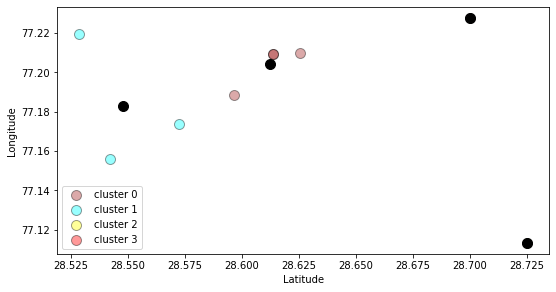

In [ ]:
kmeans_plot(glove_df,1)

In [ ]:
print("Visting order of clusters for",i+1,"is",arr_perm_tfidf)
print("Total distance travelled is",arr_dist_tfidf)

Visting order of clusters for 2 is [[0, 1, 2, 3]]
Total distance travelled is [0.46594611785678614]


In [ ]:
counter=1
for i in arr_perm_tfidf[0]:
  list_c=np.where(kmeans_obj[0]==i)
  # print(list_c)
  X_tr=glove_df.iloc[list_c]
  print("Travel locations for day",counter)
  print(X_tr['place'].to_numpy())
  counter=counter+1

Travel locations for day 1
['Art of Living Center' 'Gurudwara Bangla Sahib' 'Sai Baba Temple'
 'The Chanakya']
Travel locations for day 2
['DLF Promenade Mall' 'Sangam Courtyard' 'Select Citywalk']
Travel locations for day 3
['Adventure Island']
Travel locations for day 4
['Majnu ka Tilla']


In [ ]:
df_bmark = pd.read_csv('/content/drive/MyDrive/IR_Project_Shared/test_data_project - Sheet1.csv')
df_bmark.head(2)
## extract benchmark data in these lists

bmark_historical = []
bmark_beaches = []
bmark_temples = []
bmark_parks = []

bmark_historical.append(df_bmark.loc[0]["place1"])
bmark_historical.append(df_bmark.loc[0]["place2"])
bmark_historical.append(df_bmark.loc[0]["place3"])
bmark_historical.append(df_bmark.loc[0]["place4"])
bmark_historical.append(df_bmark.loc[0]["place5"])
bmark_historical.append(df_bmark.loc[0]["place6"])
bmark_historical.append(df_bmark.loc[0]["place7"])
bmark_historical.append(df_bmark.loc[0]["place8"])
bmark_historical.append(df_bmark.loc[0]["place9"])
bmark_historical.append(df_bmark.loc[0]["place10"])

bmark_beaches.append(df_bmark.loc[1]["place1"])
bmark_beaches.append(df_bmark.loc[1]["place2"])
bmark_beaches.append(df_bmark.loc[1]["place3"])
bmark_beaches.append(df_bmark.loc[1]["place4"])
bmark_beaches.append(df_bmark.loc[1]["place5"])
bmark_beaches.append(df_bmark.loc[1]["place6"])
bmark_beaches.append(df_bmark.loc[1]["place7"])
bmark_beaches.append(df_bmark.loc[1]["place8"])
bmark_beaches.append(df_bmark.loc[1]["place9"])
bmark_beaches.append(df_bmark.loc[1]["place10"])

bmark_temples.append(df_bmark.loc[2]["place1"])
bmark_temples.append(df_bmark.loc[2]["place2"])
bmark_temples.append(df_bmark.loc[2]["place3"])
bmark_temples.append(df_bmark.loc[2]["place4"])
bmark_temples.append(df_bmark.loc[2]["place5"])
bmark_temples.append(df_bmark.loc[2]["place6"])
bmark_temples.append(df_bmark.loc[2]["place7"])
bmark_temples.append(df_bmark.loc[2]["place8"])
bmark_temples.append(df_bmark.loc[2]["place9"])
bmark_temples.append(df_bmark.loc[2]["place10"])

bmark_parks.append(df_bmark.loc[3]["place1"])
bmark_parks.append(df_bmark.loc[3]["place2"])
bmark_parks.append(df_bmark.loc[3]["place3"])
bmark_parks.append(df_bmark.loc[3]["place4"])
bmark_parks.append(df_bmark.loc[3]["place5"])
bmark_parks.append(df_bmark.loc[3]["place6"])
bmark_parks.append(df_bmark.loc[3]["place7"])
bmark_parks.append(df_bmark.loc[3]["place8"])
bmark_parks.append(df_bmark.loc[3]["place9"])
bmark_parks.append(df_bmark.loc[3]["place10"])

print(bmark_historical)
print(bmark_beaches)
print(bmark_temples)
print(bmark_parks)
## extract query outputs




query_output_historical = make_querytfidf("I want to visit historical places", "Mumbai","glovepool")
# print(query_output_historical)
query_output_historical=query_output_historical[:10]['place']
query_output_historical = [x for x in query_output_historical]

query_output_beaches = make_querytfidf("I want to visit beach and beaches", "Mumbai","glovepool")
query_output_beaches=query_output_beaches[:10]['place']
query_output_beaches = [x for x in query_output_beaches]

query_output_temples = make_querytfidf("I want to visit temple and temples", "Mumbai","glovepool")
query_output_temples =query_output_temples [:10]['place']
query_output_temples = [x for x in query_output_temples]

query_output_parks = make_querytfidf("I want to visit park and parks", "New Delhi","glovepool")
print(query_output_parks)
query_output_parks=query_output_parks[:10]['place']
query_output_parks = [x for x in query_output_parks]

print(query_output_historical)
print(query_output_beaches)
print(query_output_temples)
print(query_output_parks)


## compute performance of the queries, in terms of precision@10

precision_10_historical = len(set(bmark_historical).intersection(set(query_output_historical)))/10 * 100
print(precision_10_historical)

precision_10_beaches = len(set(bmark_beaches).intersection(set(query_output_beaches)))/10 * 100
print(precision_10_beaches)


precision_10_temples = len(set(bmark_temples).intersection(set(query_output_temples)))/10 * 100
print(precision_10_temples)

precision_10_parks = len(set(bmark_parks).intersection(set(query_output_parks)))/10 * 100
print(precision_10_parks)

sum=0
sum=sum+precision_10_historical+precision_10_beaches+precision_10_temples+precision_10_parks
sum=sum/4
print("Avg precision for Glove pool Model",sum)

['St. Thomas Cathedral Mumbai', 'Bombay High Court', 'Malabar Hill', 'Chhatrapati Shivaji Maharaj Vastu Sangrahalaya', 'Churchgate Railway Station', 'Elephanta Caves', 'Haji Ali Dargah', 'Kanheri Caves', 'Marine Drive', 'Shree Siddhivinayak']
['Marine Drive', 'Rock Beach', 'Manori Beach', 'Girgaum Chowpatty', 'Gorai Beach', 'Aksa Beach', 'Juhu Beach', 'Silver Beach', 'Madh Island', 'Marve Beach']
['Shree Siddhivinayak', 'Shri Swaminarayan Mandir', 'Shree Saraswati Temple', 'Parsi Fire Temple', 'Walkeshwar Temple', 'Babulnath Mandir', 'Swami Samarth Temple', 'Walkeshwar Temple', 'Mahalakshmi Temple', '\nVitthal Rukmini Mandir']
['Nehru Park', 'Millennium Park', 'Rajpath', 'Priyadarshini Park', 'Hauz Khas District Park', 'Swarn Jayanti Park', 'Waste to Wonder Park', 'Central Park', 'Fountain Park', 'Astha Kunj Park']
          city                    place  \
1    New Delhi       DLF Promenade Mall   
3    New Delhi         Adventure Island   
18   New Delhi      Buddha Jayanti Park   
2

In [ ]:
!pip install python-tsp
import numpy as np
from python_tsp.exact import solve_tsp_dynamic_programming
from scipy.spatial.distance import cdist
def tfidf_dist(ob):
  arr=pd.DataFrame(ob.cluster_centers_)
  arr.shape

  distance_matrix = cdist(
      arr.values, 
      arr.values,
  )
  distance_matrix

  permutation, distance = solve_tsp_dynamic_programming(distance_matrix)
  return permutation,distance

#Glove RNN

In [ ]:
from flair.embeddings import WordEmbeddings, DocumentRNNEmbeddings
def processing_glovernn(data):
  glove_embedding = WordEmbeddings('glove')
  document_embeddings = DocumentRNNEmbeddings([glove_embedding])
  embedding=[]
  for i, j in data.iterrows():
    sentence = Sentence(j['review'])
    document_embeddings.embed(sentence)
    embedding.append(sentence.get_embedding().detach().cpu().numpy())
  return embedding

In [ ]:
delhi_embedding = processing_glovernn(delhi_data)
mumbai_embedding = processing_glovernn(mumbai_data)

In [ ]:
make_querytfidf("", 'new delhi', 'glovernn')